In [1]:
import pandas as pd

# Charger le fichier CSV
file_path = "/content/weather-prediction.csv"


# Lire les premières lignes du fichier pour analyse
df = pd.read_csv(file_path)
df.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [2]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np

# Convertir la colonne 'date' en format datetime
df['date'] = pd.to_datetime(df['date'])

# Extraire des caractéristiques temporelles
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Encoder la variable catégorielle 'weather' en numérique
label_encoder = LabelEncoder()
df['weather'] = label_encoder.fit_transform(df['weather'])

# Normaliser les colonnes numériques
scaler = MinMaxScaler()
df[['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'year', 'month', 'day']] = scaler.fit_transform(
    df[['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'year', 'month', 'day']]
)

# Supprimer la colonne 'date' car elle n'est plus nécessaire
df.drop(columns=['date'], inplace=True)

# Afficher les premières lignes après prétraitement
df.head()


,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.000000,0.387097,0.476378,0.472527,0.0,0.0,0.0,0.000000
1,0.194991,0.327957,0.389764,0.450549,0.5,0.0,0.0,0.033333
2,0.014311,0.357527,0.562992,0.208791,0.5,0.0,0.0,0.066667
3,0.363148,0.370968,0.500000,0.472527,0.5,0.0,0.0,0.100000
4,0.023256,0.282258,0.389764,0.626374,0.5,0.0,0.0,0.133333


In [27]:
df

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.000000,0.387097,0.476378,0.472527,0.00,0.0,0.0,0.000000
1,0.194991,0.327957,0.389764,0.450549,0.50,0.0,0.0,0.033333
2,0.014311,0.357527,0.562992,0.208791,0.50,0.0,0.0,0.066667
3,0.363148,0.370968,0.500000,0.472527,0.50,0.0,0.0,0.100000
4,0.023256,0.282258,0.389764,0.626374,0.50,0.0,0.0,0.133333
...,...,...,...,...,...,...,...,...
1456,0.153846,0.161290,0.346457,0.274725,0.50,1.0,1.0,0.866667
1457,0.026834,0.177419,0.346457,0.098901,0.50,1.0,1.0,0.900000
1458,0.000000,0.236559,0.303150,0.241758,0.25,1.0,1.0,0.933333
1459,0.000000,0.193548,0.240157,0.329670,1.00,1.0,1.0,0.966667


In [16]:
import tensorflow
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Définir la variable cible (temp_max) et les features
target = df['temp_max'].values
features = df.drop(columns=['temp_max']).values

# Définir la longueur de séquence pour le modèle (nombre de jours utilisés pour prédire)
sequence_length = 10

# Créer un générateur de séquences pour le modèle RNN
generator = TimeseriesGenerator(features, target, length=sequence_length, batch_size=32)

# Vérifier une séquence exemple
X_sample, y_sample = generator[0]  # Premier batch
X_sample.shape, y_sample.shape


((32, 10, 7), (32,))

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Définition du modèle RNN avec LSTM
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, features.shape[1])),
    LSTM(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
model.fit(generator, epochs=20, verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0872
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0248
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091
Epoch 16/20
46/46 ━━━━━━━━━━━

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


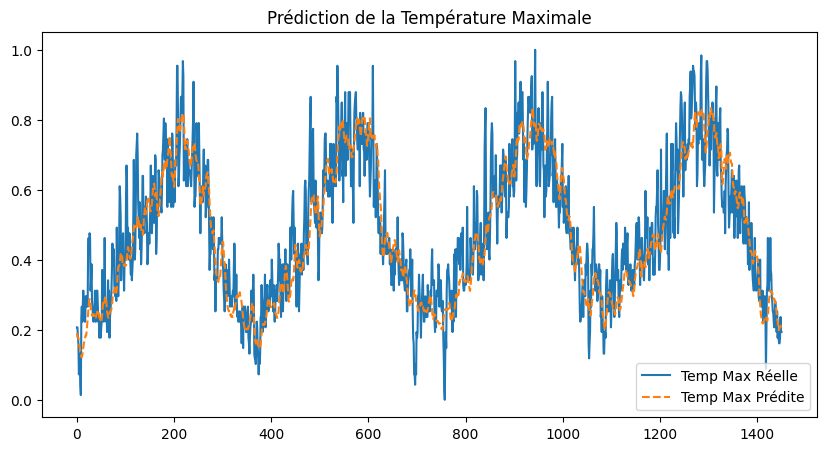

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
# Prédiction et visualisation
y_pred = model.predict(generator)

y_actual = target[sequence_length:sequence_length+len(y_pred)]  # Cible correspondante

plt.figure(figsize=(10, 5))
plt.plot(y_actual, label='Temp Max Réelle')
plt.plot(y_pred, label='Temp Max Prédite', linestyle='dashed')
plt.legend()
plt.title('Prédiction de la Température Maximale')
plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Erreur quadratique moyenne (RMSE) : 0.0922


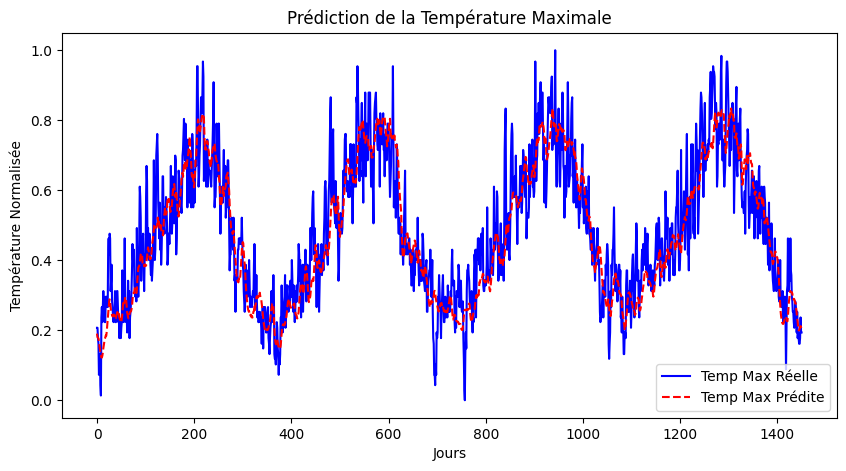

In [19]:
# Prédiction sur les données d'entraînement
y_pred = model.predict(generator)
y_actual = target[sequence_length:sequence_length+len(y_pred)]  # Cible correspondante

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"\nErreur quadratique moyenne (RMSE) : {rmse:.4f}")

# Visualisation des résultats
plt.figure(figsize=(10, 5))
plt.plot(y_actual, label='Temp Max Réelle', color='blue')
plt.plot(y_pred, label='Temp Max Prédite', linestyle='dashed', color='red')
plt.legend()
plt.title('Prédiction de la Température Maximale')
plt.xlabel('Jours')
plt.ylabel('Température Normalisée')
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1835
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104
Epoch 16/20
46/46 ━━━━━━━━━━━

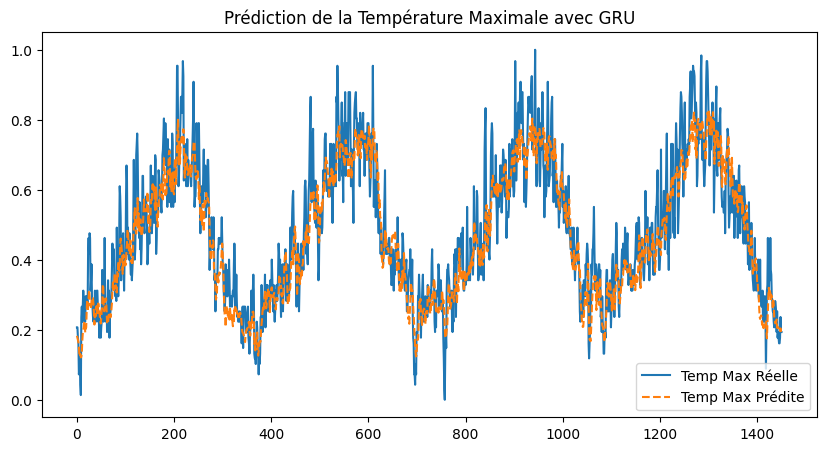

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Erreur quadratique moyenne (RMSE) : 0.0852


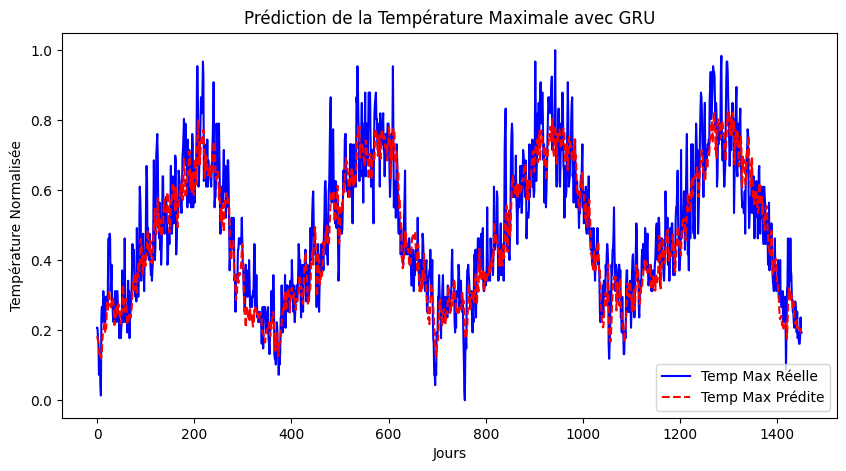

In [24]:
# prompt: refait les prediction en utilisant le GRU

import matplotlib.pyplot as plt
import numpy as np
# Définition du modèle RNN avec GRU
model = Sequential([
    tf.keras.layers.GRU(50, activation='relu', return_sequences=True, input_shape=(sequence_length, features.shape[1])),
    tf.keras.layers.GRU(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
model.fit(generator, epochs=20, verbose=1)

# Prédiction et visualisation
y_pred = model.predict(generator)

y_actual = target[sequence_length:sequence_length+len(y_pred)]  # Cible correspondante

plt.figure(figsize=(10, 5))
plt.plot(y_actual, label='Temp Max Réelle')
plt.plot(y_pred, label='Temp Max Prédite', linestyle='dashed')
plt.legend()
plt.title('Prédiction de la Température Maximale avec GRU')
plt.show()

# Prédiction sur les données d'entraînement
y_pred = model.predict(generator)
y_actual = target[sequence_length:sequence_length+len(y_pred)]  # Cible correspondante

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"\nErreur quadratique moyenne (RMSE) : {rmse:.4f}")

# Visualisation des résultats
plt.figure(figsize=(10, 5))
plt.plot(y_actual, label='Temp Max Réelle', color='blue')
plt.plot(y_pred, label='Temp Max Prédite', linestyle='dashed', color='red')
plt.legend()
plt.title('Prédiction de la Température Maximale avec GRU')
plt.xlabel('Jours')
plt.ylabel('Température Normalisée')
plt.show()



Début de l'entraînement du modèle...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.4491 - loss: 1.4466 - val_accuracy: 0.5053 - val_loss: 1.1744
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5113 - loss: 1.1054 - val_accuracy: 0.5512 - val_loss: 1.0696
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5447 - loss: 1.0606 - val_accuracy: 0.5300 - val_loss: 1.0335
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5734 - loss: 1.0429 - val_accuracy: 0.5901 - val_loss: 1.0322
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5623 - loss: 1.0251 - val_accuracy: 0.5124 - val_loss: 1.2265
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5630 - loss: 1.0012 - val_accuracy: 0.6042 - val_loss: 1.1238
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5599 - loss: 0.9776 - val_accuracy: 0.5901 - val_loss: 1.1061
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5663 - loss: 1.0029 - val_accuracy: 0.6148 - val_loss: 1.0611
Ep

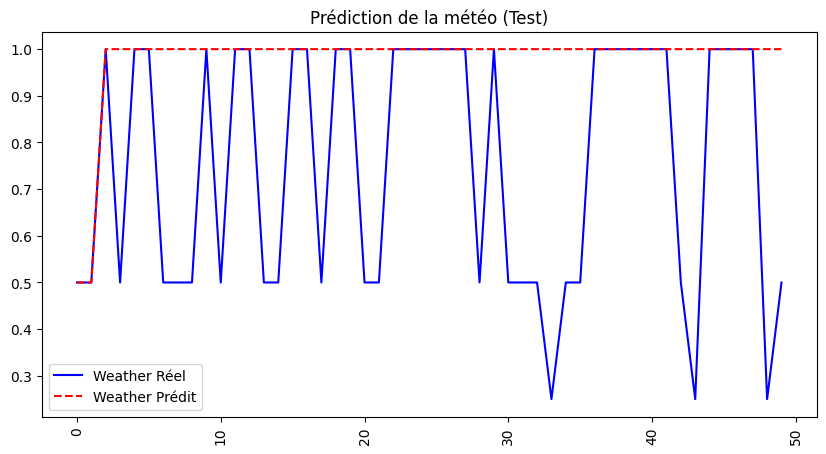


Explication du code :
1. La colonne 'weather' est encodée en valeurs numériques avec LabelEncoder.
2. Les données sont divisées en séquences de 10 pour entraîner un modèle séquentiel.
3. Le modèle est entraîné avec une fonction de perte catégorielle pour la classification.
4. Après l'entraînement, les prédictions sont décodées pour retrouver les labels d'origine.
5. Un graphique montre la comparaison entre les vraies valeurs et les prédictions.


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encodage de la colonne weather
label_encoder = LabelEncoder()
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])

# Séparation des features et de la cible
features = df.drop(columns=['weather', 'weather_encoded'])
y = df['weather_encoded']

# Séparation des données en train et test
train_size = int(0.8 * len(features))
x_train, x_test = features[:train_size], features[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Création des générateurs de séquences
sequence_length = 10  # Longueur de la séquence

def create_sequences(x, y, sequence_length):
    sequences = []
    targets = []
    for i in range(len(x) - sequence_length):
        sequences.append(x.iloc[i:i+sequence_length].values)
        targets.append(y.iloc[i+sequence_length])
    return np.array(sequences), np.array(targets)

x_train_seq, y_train_seq = create_sequences(x_train, y_train, sequence_length)
x_test_seq, y_test_seq = create_sequences(x_test, y_test, sequence_length)

# Définition du modèle RNN pour prédire la météo (catégorielle)
vocab_size = len(label_encoder.classes_)
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, features.shape[1])),
    LSTM(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(vocab_size, activation='softmax')  # Sortie avec softmax pour la classification
])

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
print("\nDébut de l'entraînement du modèle...")
model.fit(x_train_seq, y_train_seq, epochs=20, verbose=1, validation_data=(x_test_seq, y_test_seq))
print("\nEntraînement terminé.")

# Prédiction sur les données de test
y_pred_prob = model.predict(x_test_seq)
y_pred_test = np.argmax(y_pred_prob, axis=1)  # Convertir les probabilités en classes

# Décodage des prédictions et des valeurs réelles
y_pred_labels = label_encoder.inverse_transform(y_pred_test)
y_actual_labels = label_encoder.inverse_transform(y_test_seq)

# Affichage de quelques prédictions
for i in range(10):
    print(f"Réel: {y_actual_labels[i]}, Prédit: {y_pred_labels[i]}")

# Visualisation des prédictions
plt.figure(figsize=(10, 5))
plt.plot(y_actual_labels[:50], label='Weather Réel', color='blue')
plt.plot(y_pred_labels[:50], label='Weather Prédit', linestyle='dashed', color='red')
plt.xticks(rotation=90)
plt.legend()
plt.title('Prédiction de la météo (Test)')
plt.show()


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Encodage de la colonne weather
label_encoder = LabelEncoder()
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])

# Séparation des features et de la cible
features = df.drop(columns=['weather', 'weather_encoded'])
y = df['weather_encoded']

# Séparation des données en train et test
train_size = int(0.8 * len(features))
x_train, x_test = features[:train_size], features[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Création des générateurs de séquences
sequence_length = 10  # Longueur de la séquence

def create_sequences(x, y, sequence_length):
    sequences = []
    targets = []
    for i in range(len(x) - sequence_length):
        sequences.append(x.iloc[i:i+sequence_length].values)
        targets.append(y.iloc[i+sequence_length])
    return np.array(sequences), np.array(targets)

x_train_seq, y_train_seq = create_sequences(x_train, y_train, sequence_length)
x_test_seq, y_test_seq = create_sequences(x_test, y_test, sequence_length)

# Définition du modèle RNN pour prédire la météo (catégorielle)
vocab_size = len(label_encoder.classes_)
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, features.shape[1])),
    LSTM(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(vocab_size, activation='softmax')  # Sortie avec softmax pour la classification
])

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
print("\nDébut de l'entraînement du modèle...")
model.fit(x_train_seq, y_train_seq, epochs=20, verbose=1, validation_data=(x_test_seq, y_test_seq))
print("\nEntraînement terminé.")

# Prédiction sur les données de test
y_pred_prob = model.predict(x_test_seq)
y_pred_test = np.argmax(y_pred_prob, axis=1)  # Convertir les probabilités en classes

# Décodage des prédictions et des valeurs réelles
y_pred_labels = label_encoder.inverse_transform(y_pred_test)
y_actual_labels = label_encoder.inverse_transform(y_test_seq)

# Affichage de quelques prédictions
for i in range(10):
    print(f"Réel: {y_actual_labels[i]}, Prédit: {y_pred_labels[i]}")

# Évaluation du modèle
accuracy = accuracy_score(y_test_seq, y_pred_test)
print(f"\nPrécision globale du modèle : {accuracy:.4f}")

print("\nRapport de classification :")
print(classification_report(y_test_seq, y_pred_test, target_names=label_encoder.classes_))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test_seq, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Visualisation des prédictions
plt.figure(figsize=(10, 5))
plt.plot(y_actual_labels[:50], label='Weather Réel', color='blue')
plt.plot(y_pred_labels[:50], label='Weather Prédit', linestyle='dashed', color='red')
plt.xticks(rotation=90)
plt.legend()
plt.title('Prédiction de la météo (Test)')
plt.show()

# Explication du code
print("\nExplication du code :")
print("1. La colonne 'weather' est encodée en valeurs numériques avec LabelEncoder.")
print("2. Les données sont divisées en séquences de 10 pour entraîner un modèle séquentiel.")
print("3. Le modèle est entraîné avec une fonction de perte catégorielle pour la classification.")
print("4. Après l'entraînement, les prédictions sont décodées pour retrouver les labels d'origine.")
print("5. Un graphique montre la comparaison entre les vraies valeurs et les prédictions.")
print("6. La précision globale du modèle est affichée, accompagnée d'un rapport de classification détaillé.")
print("7. Une matrice de confusion est générée pour visualiser les erreurs de classification.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Début de l'entraînement du modèle...
Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.4182 - loss: 1.4957 - val_accuracy: 0.3604 - val_loss: 1.4317
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4855 - loss: 1.1138 - val_accuracy: 0.6396 - val_loss: 1.1726
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5585 - loss: 1.0812 - val_accuracy: 0.5548 - val_loss: 1.1174
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5566 - loss: 1.0607 - val_accuracy: 0.5583 - val_loss: 1.1237
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5721 - loss: 0.9915 - val_accuracy: 0.5371 - val_loss: 1.1588
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5578 - loss: 0.9892 - val_accuracy: 0.6360 - val_loss: 1.0821
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6183 - loss: 0.9472 - val_accuracy: 0.6254 - val_loss: 1.1165
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5739 - loss: 0

ValueError: Number of classes, 4, does not match size of target_names, 5. Try specifying the labels parameter

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step

Erreurs RMSE par variable météo :
precipitation: 0.1465
temp_max: 0.6841
temp_min: 0.3530
wind: 0.7795
weather: 0.7138
year: 0.5360
month: 0.5339


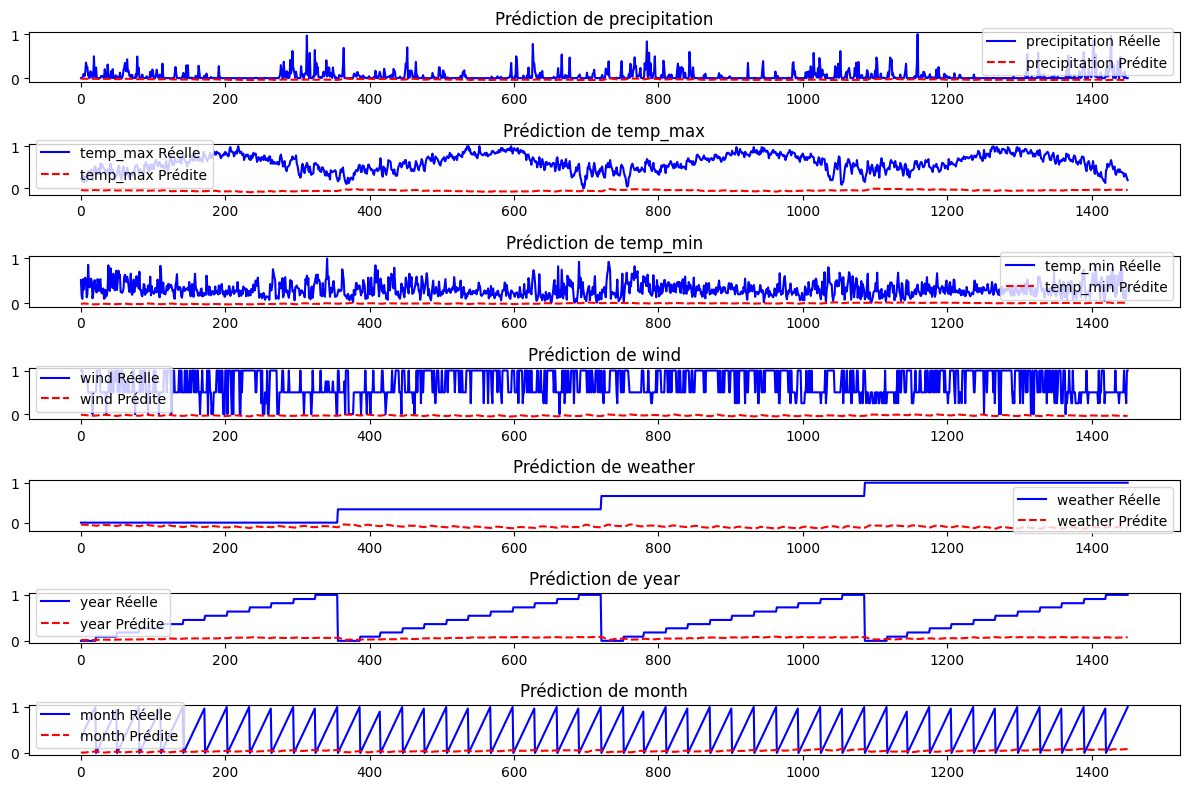

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error



# Prédiction sur les données d'entraînement
y_pred = model.predict(generator)
y_actual = features[sequence_length:sequence_length+len(y_pred)]  # Cible correspondante

# Calcul de l'erreur quadratique moyenne (RMSE) pour chaque variable
rmse_values = np.sqrt(np.mean((y_actual - y_pred) ** 2, axis=0))
print("\nErreurs RMSE par variable météo :")
for i, col in enumerate(df.columns[:-1]):  # Exclure la dernière colonne (target initiale)
    print(f"{col}: {rmse_values[i]:.4f}")

# Visualisation de la prédiction pour chaque variable météo
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(len(df.columns) - 1, 1, i + 1)
    plt.plot(y_actual[:, i], label=f'{col} Réelle', color='blue')
    plt.plot(y_pred[:, i], label=f'{col} Prédite', linestyle='dashed', color='red')
    plt.legend()
    plt.title(f'Prédiction de {col}')
plt.tight_layout()
plt.show()




ValueError: Data and targets have to be of same length. Data length is 1168 while target length is 1158